In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
#Classification
'''Logistic Regression
    KNN-Classifier,
    naive-bayes,
    decision-tree
    random-forest
    ada-boost
    gboost
    xgboost
    gridsearchCV'''

'Logistic Regression\n    KNN-Classifier,\n    naive-bayes,\n    decision-tree\n    random-forest\n    ada-boost\n    gboost\n    xgboost\n    gridsearchCV'

In [67]:
columns=['age','gender','TB','DB','AAP','ssgt','ssot','tp','alb','a`\`b','selector']
data = pd.read_csv('ILPD.csv',header=None,names=columns)
data.head()

,age,gender,TB,DB,AAP,ssgt,ssot,tp,alb,a`\`b,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       583 non-null    int64  
 1   gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   AAP       583 non-null    int64  
 5   ssgt      583 non-null    int64  
 6   ssot      583 non-null    int64  
 7   tp        583 non-null    float64
 8   alb       583 non-null    float64
 9   a`\`b     579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
TB,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
DB,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
AAP,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
ssgt,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
ssot,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
tp,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
alb,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
a`\`b,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
selector,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


There are some missing values in tha a\b 
There are extreme outliers in TB,DB,AAP,ssgt,ssot columns 

In [70]:
data.shape

(583, 11)

In [71]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
ssgt        0
ssot        0
tp          0
alb         0
a`\`b       4
selector    0
dtype: int64

In [72]:
pd.crosstab(data['gender'],data['selector'])

selector,1,2
gender,,
Female,92,50
Male,324,117


<Axes: xlabel='gender'>

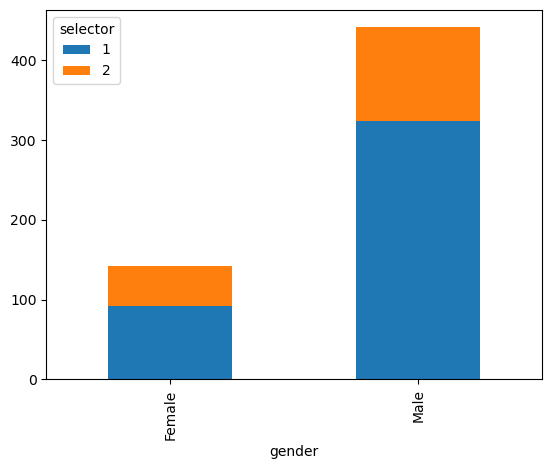

In [73]:
(pd.crosstab(data['gender'],data['selector'])).plot(kind='bar',stacked=True)

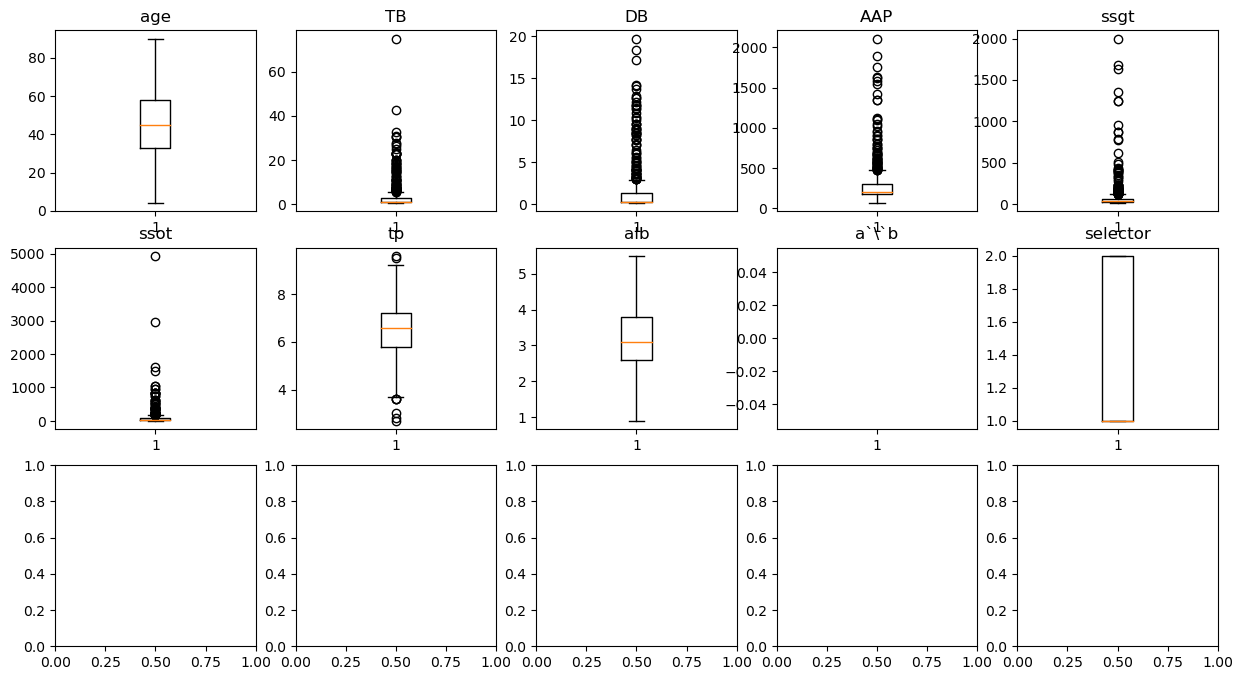

In [74]:
fig,ax = plt.subplots(3,5,figsize=(15,8))
col = data.select_dtypes(include=np.number).columns
for col,subplot in zip(col,ax.flatten()):
    subplot.boxplot(data[col])
    subplot.set_title(col)

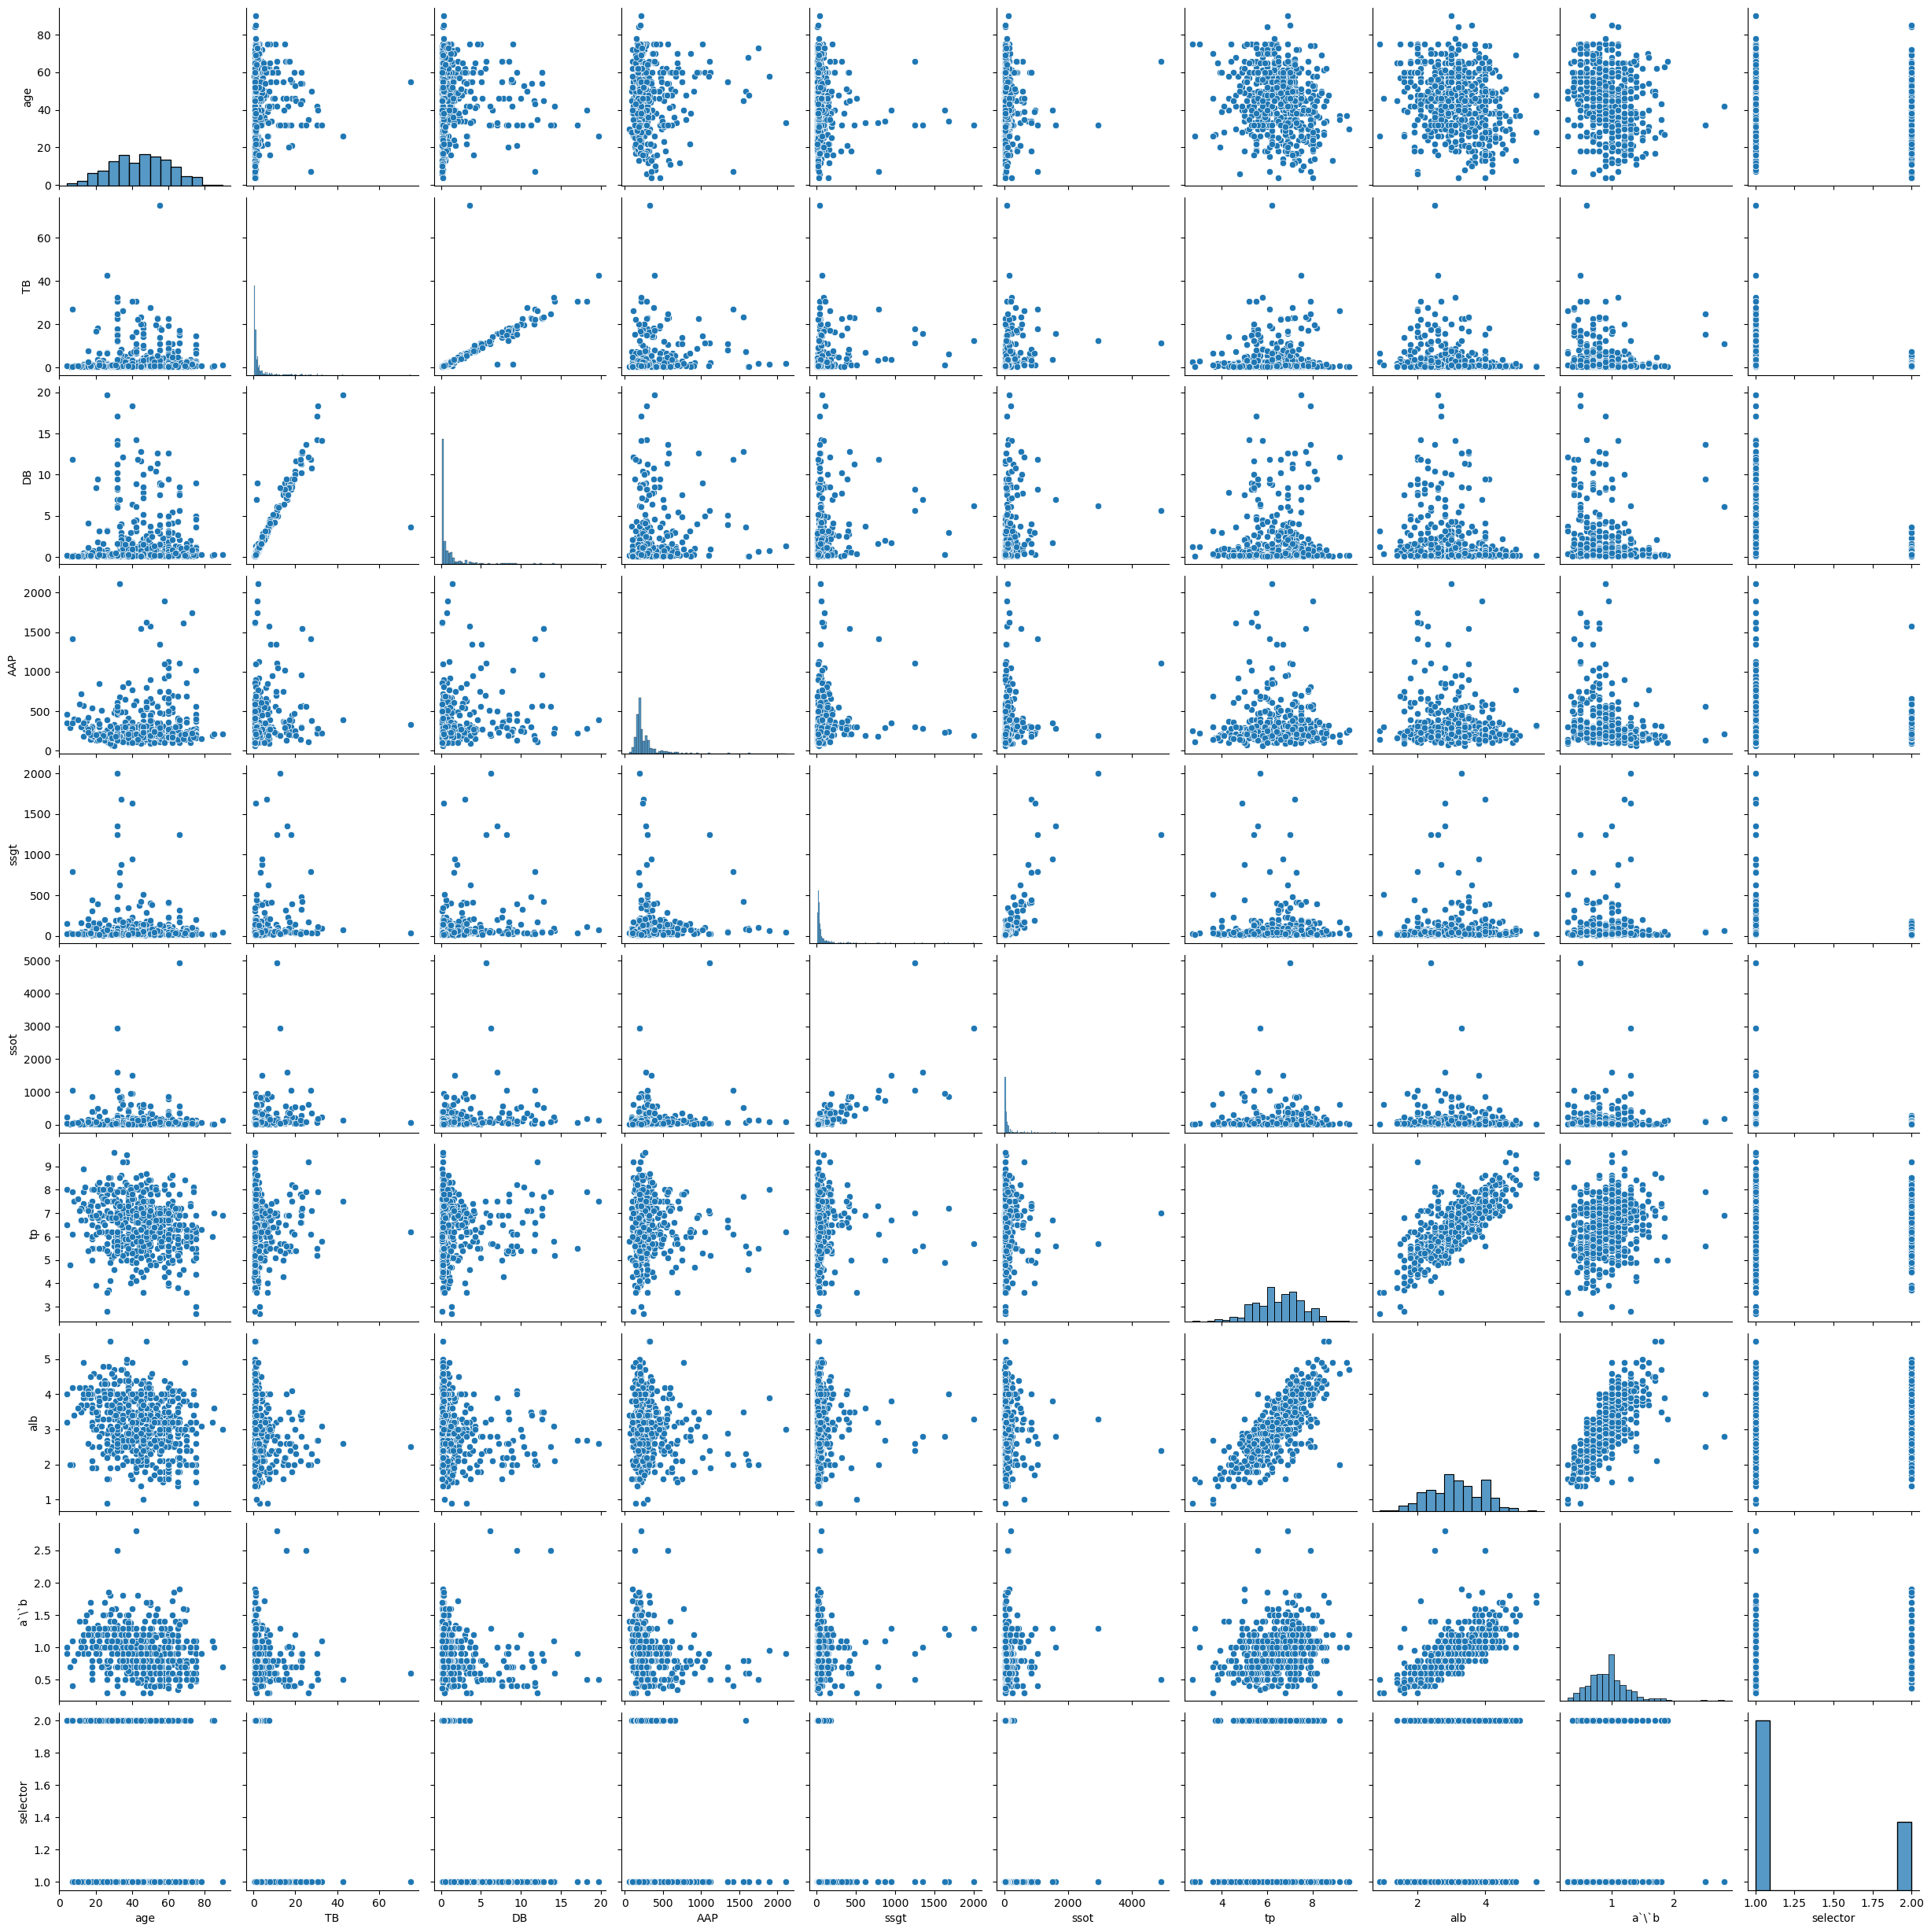

In [75]:
sns.pairplot(data)

In [77]:
data['a`\`b'].fillna(method='ffill',axis=0,inplace=True)

C:\Users\K\AppData\Local\Temp\ipykernel_19340\1450441581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),mask=np.triu(data.corr(),1),annot=True)


<Axes: >

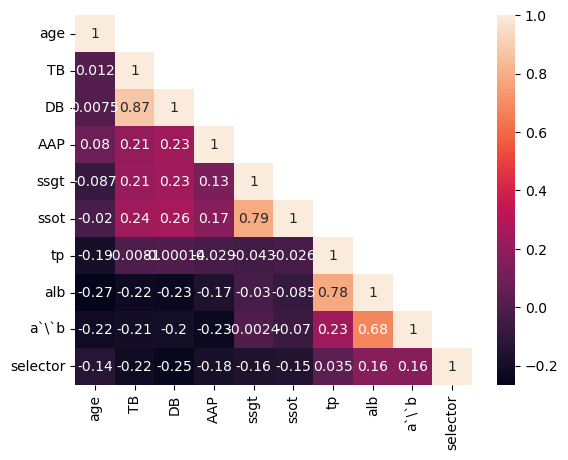

In [111]:
sns.heatmap(data.corr(),mask=np.triu(data.corr(),1),annot=True)

### Transformation

Choosed to do Transformation because most of the data are Right skewed.

In [78]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,LabelEncoder,PowerTransformer

In [79]:
poweree = PowerTransformer(method='yeo-johnson',standardize=True)
powered_data = poweree.fit_transform(data.drop(['selector','gender'],axis=1))


In [80]:
col = data.select_dtypes(include=np.number).columns.drop(['selector'])
powered_df = pd.DataFrame(powered_data,columns=col)

In [81]:
powered_df

,age,TB,DB,AAP,ssgt,ssot,tp,alb,a`\`b
0,1.243989,-0.967323,-1.189815,-0.427829,-1.410705,-1.324274,0.255159,0.196188,-0.042702
1,1.062888,1.721756,1.716247,1.771466,0.708070,0.863923,0.943655,0.070197,-0.611892
2,1.062888,1.589707,1.625382,1.367757,0.638775,0.504056,0.448229,0.196188,-0.076287
3,0.820647,-0.397769,-0.224252,-0.498616,-1.699126,-1.139496,0.255159,0.322270,0.280100
4,1.664765,1.235002,1.256312,-0.321095,-0.437843,0.355056,0.743317,-0.934200,-2.107187
...,...,...,...,...,...,...,...,...,...
578,0.941881,-1.499153,-1.189815,1.393612,-0.966261,-0.320511,-0.576597,-1.931258,-2.263381
579,-0.282261,-1.213759,-1.189815,-2.553706,-0.039363,-0.450353,-0.487229,0.070197,0.581092
580,0.455496,-0.752676,-0.799383,0.207133,0.380517,0.145390,-0.122077,0.070197,0.280100
581,-0.843635,0.001729,-0.007979,-0.469905,-0.322962,-0.405150,0.255159,0.322270,0.280100


In [82]:
labele = LabelEncoder()
encoded_df = pd.DataFrame({'gender' : labele.fit_transform(data['gender'])})

In [83]:
encoded_df

,gender
0,0
1,1
2,1
3,1
4,1
...,...
578,1
579,1
580,1
581,1


In [84]:
pd.concat([encoded_df,powered_df,data['selector']],axis=1)

,gender,age,TB,DB,AAP,ssgt,ssot,tp,alb,a`\`b,selector
0,0,1.243989,-0.967323,-1.189815,-0.427829,-1.410705,-1.324274,0.255159,0.196188,-0.042702,1
1,1,1.062888,1.721756,1.716247,1.771466,0.708070,0.863923,0.943655,0.070197,-0.611892,1
2,1,1.062888,1.589707,1.625382,1.367757,0.638775,0.504056,0.448229,0.196188,-0.076287,1
3,1,0.820647,-0.397769,-0.224252,-0.498616,-1.699126,-1.139496,0.255159,0.322270,0.280100,1
4,1,1.664765,1.235002,1.256312,-0.321095,-0.437843,0.355056,0.743317,-0.934200,-2.107187,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.941881,-1.499153,-1.189815,1.393612,-0.966261,-0.320511,-0.576597,-1.931258,-2.263381,2
579,1,-0.282261,-1.213759,-1.189815,-2.553706,-0.039363,-0.450353,-0.487229,0.070197,0.581092,1
580,1,0.455496,-0.752676,-0.799383,0.207133,0.380517,0.145390,-0.122077,0.070197,0.280100,1
581,1,-0.843635,0.001729,-0.007979,-0.469905,-0.322962,-0.405150,0.255159,0.322270,0.280100,1


In [88]:
final_df = pd.concat([encoded_df,powered_df,data['selector']],axis=1)

## Logistic Regression

In [87]:
import statsmodels.api as sm

In [92]:
X = final_df.drop(['selector'],axis=1)
y = final_df['selector']

In [94]:
sm.add_constant(X)

,const,gender,age,TB,DB,AAP,ssgt,ssot,tp,alb,a`\`b
0,1.0,0,1.243989,-0.967323,-1.189815,-0.427829,-1.410705,-1.324274,0.255159,0.196188,-0.042702
1,1.0,1,1.062888,1.721756,1.716247,1.771466,0.708070,0.863923,0.943655,0.070197,-0.611892
2,1.0,1,1.062888,1.589707,1.625382,1.367757,0.638775,0.504056,0.448229,0.196188,-0.076287
3,1.0,1,0.820647,-0.397769,-0.224252,-0.498616,-1.699126,-1.139496,0.255159,0.322270,0.280100
4,1.0,1,1.664765,1.235002,1.256312,-0.321095,-0.437843,0.355056,0.743317,-0.934200,-2.107187
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.941881,-1.499153,-1.189815,1.393612,-0.966261,-0.320511,-0.576597,-1.931258,-2.263381
579,1.0,1,-0.282261,-1.213759,-1.189815,-2.553706,-0.039363,-0.450353,-0.487229,0.070197,0.581092
580,1.0,1,0.455496,-0.752676,-0.799383,0.207133,0.380517,0.145390,-0.122077,0.070197,0.280100
581,1.0,1,-0.843635,0.001729,-0.007979,-0.469905,-0.322962,-0.405150,0.255159,0.322270,0.280100


In [96]:
X = sm.add_constant(X)

In [98]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: selector, Length: 583, dtype: int64

In [97]:
model = sm.Logit(y,X)
model.fit()

ValueError: endog must be in the unit interval.

In [99]:
final_df['selector'].unique()

array([1, 2], dtype=int64)

In [101]:
final_df['selector'].apply( lambda x : 0 if x==1 else 1)

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: selector, Length: 583, dtype: int64

In [102]:
final_df['selector'] = final_df['selector'].apply( lambda x : 0 if x==1 else 1)

In [104]:
X = final_df.drop(['selector'],axis=1)
y = final_df['selector']

In [106]:
model = sm.Logit(y,X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.533166
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               selector   No. Observations:                  583
Model:                          Logit   Df Residuals:                      573
Method:                           MLE   Df Model:                            9
Date:                Tue, 26 Sep 2023   Pseudo R-squ.:                  0.1098
Time:                        20:36:29   Log-Likelihood:                -310.84
converged:                       True   LL-Null:                       -349.18
Covariance Type:            nonrobust   LLR p-value:                 7.306e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gender        -1.1118      0.121     -9.226      0.000      -1.348      -0.876
age           -0.2654      0.101     -2.619      0.009      -0.464      -0.067
TB            -0.0276      0.480     -0.058      0.954      -0.967       0.912
DB            -0.2791      0.477     -0.585      0.558      -1.214       0.656
AAP           -0.2060      0.119     -1.733      0.083      -0.439       0.027
ssgt          -0.4282      0.168     -2.556      0.011      -0.756      -0.100
ssot          -0.0415      0.171     -0.242      0.809      -0.377       0.294
tp            -0.9216      0.373     -2.473      0.013      -1.652      -0.191
alb            1.2245      0.541      2.262      0.024       0.164       2.285
a`\`b         -0.4734      0.337     -1.406      0.160      -1.133       0.186
==============================================================================
"""

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(data['category_var'], data['target'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')


In [118]:
from scipy.stats import ttest_ind

def ttest_continous_logistic_model(independent_var):

    # Separate the data into two groups based on the target variable
    group_0 = final_df[final_df['selector'] == 0][independent_var]
    group_1 = final_df[final_df['selector'] == 1][independent_var]

    # Perform a t-test
    t_statistic, p_value = ttest_ind(group_0, group_1)
    print(independent_var,'vs selector')
    print(f'T-Statistic: {t_statistic}')
    print(f'P-Value: {p_value}\n')
    


for col in final_df.drop(['selector'],axis=1).columns:
    ttest_continous_logistic_model(col)

gender vs selector
T-Statistic: 1.9933296448867386
P-Value: 0.046692526264183555

age vs selector
T-Statistic: 3.369848999271026
P-Value: 0.0008019686360980164

TB vs selector
T-Statistic: 8.137136826908563
P-Value: 2.468059097842422e-15

DB vs selector
T-Statistic: 8.117701565464994
P-Value: 2.850074722100096e-15

AAP vs selector
T-Statistic: 5.730226750186973
P-Value: 1.6116539661284435e-08

ssgt vs selector
T-Statistic: 7.570551835246474
P-Value: 1.4676897752138434e-13

ssot vs selector
T-Statistic: 7.797972828251632
P-Value: 2.9271206036623406e-14

tp vs selector
T-Statistic: -0.8235889461482317
P-Value: 0.41051109288210386

alb vs selector
T-Statistic: -3.944146756220469
P-Value: 8.986621857027482e-05

a`\`b vs selector
T-Statistic: -4.4722792147680765
P-Value: 9.31086098053488e-06



tp vs selector
T-Statistic: -0.8235889461482317
P-Value: 0.41051109288210386

pvalue > 0.05
fails to Rejects H0
mean of TP are equal to mean of selector 



In [119]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.70,random_state=1)

Xtrain

,gender,age,TB,DB,AAP,ssgt,ssot,tp,alb,a`\`b
440,0,0.272048,-0.752676,-0.799383,-0.282988,-0.710675,-1.139496,0.448229,1.460775,1.610158
110,0,-1.286481,-0.967323,-0.799383,-0.414061,-2.264752,-2.501866,-0.926262,-1.059268,-0.726802
396,1,1.784553,-0.397769,-0.483709,-0.603531,-0.269858,-0.405150,-0.122077,0.322270,0.581092
311,0,0.577463,1.852026,1.852298,1.560465,0.241875,0.095935,0.644228,0.448440,-0.042702
395,1,0.026461,-0.752676,-0.799383,-1.260095,-0.636179,-1.139496,-0.214508,0.070197,0.280100
...,...,...,...,...,...,...,...,...,...,...
129,1,0.026461,0.950230,1.139738,0.354267,0.582020,0.457722,-1.263202,-1.059268,-0.390173
144,0,0.026461,1.150234,1.041767,-0.400418,0.691375,0.741152,-0.840026,-0.307212,0.280100
72,0,1.844379,-0.752676,-0.799383,-0.197817,-0.437843,-0.837625,-1.821230,-1.433758,-0.390173
235,1,0.941881,0.206663,0.174505,0.922393,1.689835,1.597363,-1.744032,-1.433758,-0.390173


In [120]:
Xtest

,gender,age,TB,DB,AAP,ssgt,ssot,tp,alb,a`\`b
255,1,-0.406341,0.376470,0.330128,1.962163,1.027822,0.121033,-0.487229,-0.181505,0.280100
323,1,-2.064150,-0.752676,-0.799383,0.620435,0.354582,0.488946,0.159731,0.448440,0.581092
65,1,0.759942,0.109201,0.330128,1.313214,0.674272,0.751522,-0.840026,-0.809017,-0.390173
111,1,0.210760,1.074069,1.093148,0.307196,-0.125260,0.986481,-0.753001,-1.184220,-1.089158
268,1,-0.282261,1.785118,1.752541,0.913395,0.430011,0.601500,-0.753001,-1.309051,-1.618586
...,...,...,...,...,...,...,...,...,...,...
429,1,1.724682,0.519152,0.330128,2.438611,1.144639,1.135492,-0.926262,-1.433758,-1.618586
437,1,-0.593151,0.295395,0.330128,-0.909774,-1.547951,0.015788,-1.180177,-0.809017,-0.042702
224,1,1.544789,0.376470,-0.007979,1.085906,0.562082,0.015788,-0.753001,-0.055702,0.581092
128,0,0.820647,0.376470,0.464097,2.478397,0.656745,0.697874,1.456949,0.953969,0.121592


In [121]:
ytrain

440    0
110    1
396    0
311    0
395    1
      ..
129    0
144    0
72     0
235    0
37     0
Name: selector, Length: 408, dtype: int64

In [122]:
ytest

255    0
323    1
65     0
111    0
268    0
      ..
429    0
437    0
224    0
128    0
247    0
Name: selector, Length: 175, dtype: int64

Hypothesis Formation:

H0 : mu1 = m2
H1 : mu1 != mu2 


In [128]:

from scipy.stats import ttest_ind

test_stats,pvalue = ttest_ind(ytrain,ytest)

print(pvalue)
if pvalue < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fails to reject null hypothesis')
    print('mean are equal, train and test split are representative of overall data')


0.9795307944432494
Fails to reject null hypothesis
mean are equal, train and test split are representative of overall data


Perform Statistical Test:

a. T-Test (Parametric Test):

You can use a t-test if the assumptions of normality and homogeneity of variances are met.

b. Mann-Whitney U Test (Non-Parametric Test):
- If the assumptions for the t-test are not met, you can use the Mann-Whitney U test, which is a non-parametric alternative.

Examine the p-value obtained from the test. A small p-value (typically less than your chosen significance level, e.g., 0.05) suggests that there is a statistically significant difference in the means (for t-test) or distributions (for Mann-Whitney U test) of the continuous variable between the two groups defined by the target variable.

If the p-value is significant, it indicates that the continuous independent variable is associated with the binary target variable.

In [ ]:
from scipy.stats import mannwhitneyu

# Perform a Mann-Whitney U test
# u_statistic, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')

print(f'U-Statistic: {u_statistic}')
print(f'P-Value: {p_value}')


In [129]:
from sklearn.linear_model import LogisticRegression

In [179]:
base_model = LogisticRegression()
base_model.fit(Xtrain,ytrain)
base_model

LogisticRegression()

In [180]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,f1_score,recall_score,cohen_kappa_score

In [181]:
pred_y= base_model.predict(Xtest)
accuracy = accuracy_score(ytest,pred_y)
print(f'Accuracy_score of base model is {accuracy :.2f}')

Accuracy_score of base model is 0.73


In [182]:

precision = precision_score(ytest,pred_y)
print(f'precision_score of base model is {precision :.2f}\n')

f1_score = f1_score(ytest,pred_y)
print(f'f1_score of base model is {f1_score :.2f}\n')

recall_score = recall_score(ytest,pred_y)
print(f'recall_score of base model is {recall_score :.2f}\n')

precision_score of base model is 0.56

f1_score of base model is 0.37

recall_score of base model is 0.28



In [183]:
coefficient = base_model.coef_[0]
thersold = 0.5
significant_features = X.columns[coefficient>thersold]

print(f'Significant_features are {significant_features.values}')

Significant_features are ['gender' 'alb']


In [184]:
X.columns

Index(['gender', 'age', 'TB', 'DB', 'AAP', 'ssgt', 'ssot', 'tp', 'alb',
       'a`\`b'],
      dtype='object')

In [185]:
kappa_score = cohen_kappa_score(ytest,pred_y)
print(f'recall_score of base model is {kappa_score :.2f}\n')

recall_score of base model is 0.23



Interpret Cohen's Kappa Value. Higher values indicate better agreement beyond chance.

In [186]:
confusion_matrix(ytest,pred_y)

array([[114,  11],
       [ 36,  14]], dtype=int64)

In [187]:
from sklearn.metrics import roc_auc_score,roc_curve

In [188]:
base_model.predict_proba(Xtest)

array([[0.8624757 , 0.1375243 ],
       [0.57511223, 0.42488777],
       [0.90265099, 0.09734901],
       [0.88201528, 0.11798472],
       [0.91942045, 0.08057955],
       [0.94504024, 0.05495976],
       [0.85528311, 0.14471689],
       [0.71932089, 0.28067911],
       [0.85054285, 0.14945715],
       [0.91515035, 0.08484965],
       [0.61681823, 0.38318177],
       [0.88563107, 0.11436893],
       [0.65941323, 0.34058677],
       [0.35612573, 0.64387427],
       [0.80126399, 0.19873601],
       [0.61863512, 0.38136488],
       [0.94954944, 0.05045056],
       [0.58838028, 0.41161972],
       [0.43822443, 0.56177557],
       [0.67384004, 0.32615996],
       [0.61682717, 0.38317283],
       [0.96843611, 0.03156389],
       [0.92684986, 0.07315014],
       [0.5670128 , 0.4329872 ],
       [0.97452535, 0.02547465],
       [0.84726226, 0.15273774],
       [0.71845334, 0.28154666],
       [0.36351853, 0.63648147],
       [0.4205679 , 0.5794321 ],
       [0.4093959 , 0.5906041 ],
       [0.

In [189]:
predict_proba = base_model.predict_proba(Xtest)

In [200]:
auc = roc_auc_score(ytest,predict_proba[:,1])

In [195]:
roc_auc_score(ytest,predict_proba[:,1])

0.74576

In [210]:
fpr, tpr, thersholds = roc_curve(ytest,predict_proba[:,1])

In [211]:
thersholds

array([1.79350431, 0.79350431, 0.69208825, 0.61764344, 0.60627277,
       0.60089033, 0.56177557, 0.54322181, 0.54233675, 0.53981987,
       0.53636612, 0.53154477, 0.51896602, 0.51672384, 0.51355429,
       0.4877099 , 0.47680875, 0.47358207, 0.45402797, 0.43240335,
       0.43087966, 0.41936933, 0.41161972, 0.40180926, 0.3966632 ,
       0.39641807, 0.39412711, 0.38811151, 0.38485594, 0.38318177,
       0.37843701, 0.37567982, 0.36507412, 0.36241649, 0.34797497,
       0.34319623, 0.34058677, 0.33365812, 0.33018811, 0.32615996,
       0.30189081, 0.29921221, 0.28022973, 0.27531552, 0.2733422 ,
       0.24995275, 0.19336561, 0.1890515 , 0.18247281, 0.17618887,
       0.17180238, 0.17029802, 0.16697592, 0.15561196, 0.15273774,
       0.15076111, 0.14244141, 0.13787474, 0.1375243 , 0.1357999 ,
       0.11798472, 0.11797561, 0.11436893, 0.10856804, 0.08057955,
       0.07787554, 0.00625041])

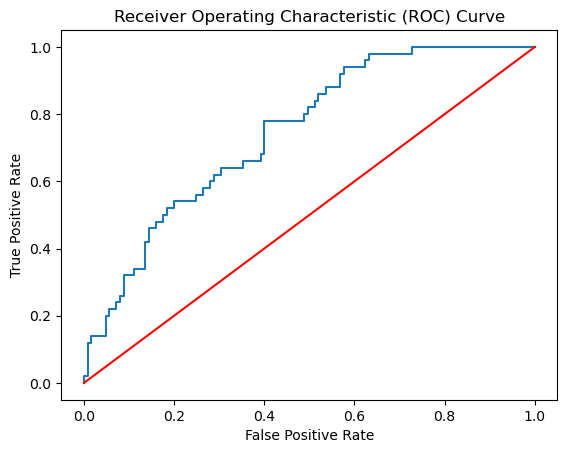

In [203]:
plt.plot(fpr,tpr,label=f'ROC Curve : {auc:.2f}')
plt.plot([0,1],[0,1],color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

The ROC curve is plotted to visualize the model's discrimination ability.

In [205]:
from sklearn.calibration import calibration_curve

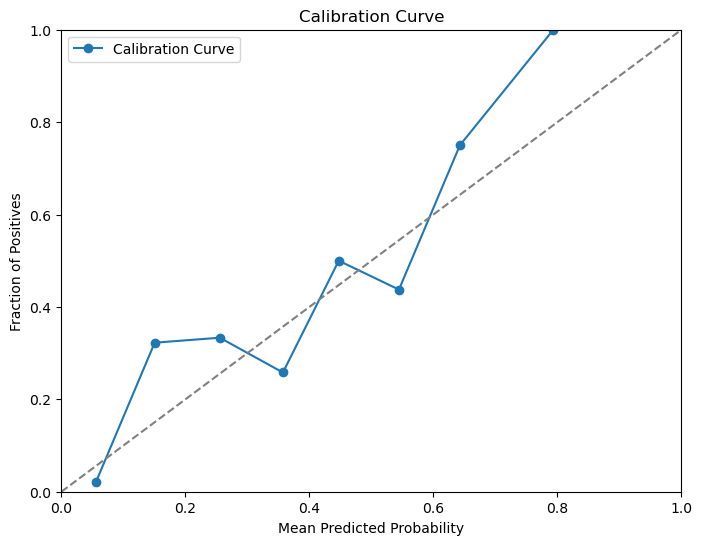

In [206]:
# Calculate calibration curve
prob_true, prob_pred = calibration_curve(ytest, base_model.predict_proba(Xtest)[:, 1], n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()



